In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Leitura da planilha
df = pd.read_excel(r"C:\Users\lukec\OneDrive\Área de Trabalho\Programação\Jupyter\RedeAdm_BR.xlsx", skiprows=0)
pd.options.display.float_format = '{:.2f}'.format

# Carregando os dados (ajuste o caminho se necessário)
df2 = pd.read_excel(r"C:\Users\lukec\OneDrive\Área de Trabalho\Programação\Jupyter\Tabela 4.16 (SemEnsinoMedioMotivParar_BR).xlsx")  # Substitua pelo nome correto da sua planilha



df.head(21)

,Distribuição(%),Total Pública,Total Privada,fundamental Pública,fundamental Privada,médio Pública,médio Privada,superior Pública,superior Privada
0,Total,8096.98,2390.84,22412.48,4754.46,7587.87,1125.28,2412.54,6381.90
1,Sexo(Homem),50.15,51.30,52.28,50.96,49.60,47.28,48.50,41.80
2,Sexo(Mulher),49.85,48.70,47.72,49.04,50.40,52.72,51.40,58.20
3,Classe E,36.25,9.19,39.54,8.07,31.56,6.78,10.33,5.68
4,Classe D,28.19,13.74,28.52,13.73,26.97,9.27,14.76,11.20
5,Classe C,17.68,16.50,17.54,15.26,20.30,13.82,18.39,17.65
6,Classe B,12.96,20.74,10.54,24.60,15.08,23.12,24.72,29.13
7,Classe A,4.92,39.84,3.87,38.35,6.08,47.01,31.79,36.33


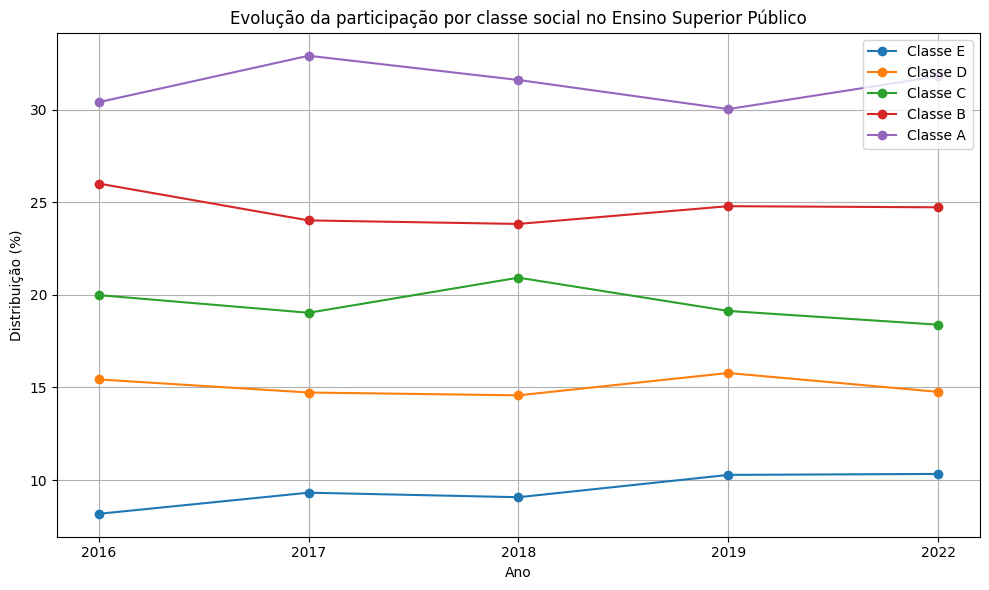

In [13]:

arquivo = r"C:\Users\lukec\OneDrive\Área de Trabalho\Programação\Jupyter\RedeAdm_BR.xlsx"

# ✅ Ordem desejada: do mais antigo para o mais recente
anos = ['2016', '2017', '2018', '2019', '2022']

# Índices das linhas das classes sociais (verificados na imagem que você mandou)
linhas = [3, 4, 5, 6, 7]  # Classe E, D, C, B, A
classes = ['Classe E', 'Classe D', 'Classe C', 'Classe B', 'Classe A']

# Índice da coluna "superior Pública"
coluna = 7  # Coluna H

# Dicionário para armazenar os dados
dados = {classe: [] for classe in classes}

# Coleta dos dados seguindo a ordem dos anos
for ano in anos:
    df = pd.read_excel(arquivo, sheet_name=ano)
    for i, linha in enumerate(linhas):
        valor = df.iloc[linha, coluna]
        dados[classes[i]].append(valor)

# Criação do gráfico
plt.figure(figsize=(10, 6))
for classe, valores in dados.items():
    plt.plot(anos, valores, marker='o', label=classe)

plt.xlabel("Ano")
plt.ylabel("Distribuição (%)")
plt.title("Evolução da participação por classe social no Ensino Superior Público")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\lukec\AppData\Local\Temp\ipykernel_25076\1570537260.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_formatado = df_formatado.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)


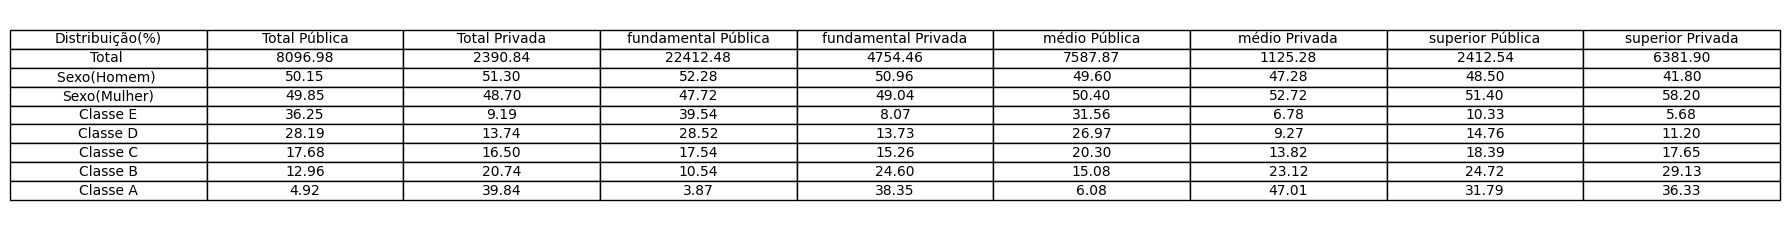

In [66]:
# Formata todos os valores numéricos para 2 casas decimais
df_formatado = df.copy()
df_formatado = df_formatado.applymap(lambda x: f"{x:.2f}" if isinstance(x, (int, float)) else x)

# Cria o gráfico da tabela
plt.figure(figsize=(18, len(df_formatado)*0.3))
plt.axis('off')  # Remove os eixos

tabela = plt.table(
    cellText=df_formatado.values,
    colLabels=df_formatado.columns,
    loc='center',
    cellLoc='center',
    colLoc='center'
)

tabela.auto_set_font_size(False)
tabela.set_fontsize(10)

plt.tight_layout()
plt.show()


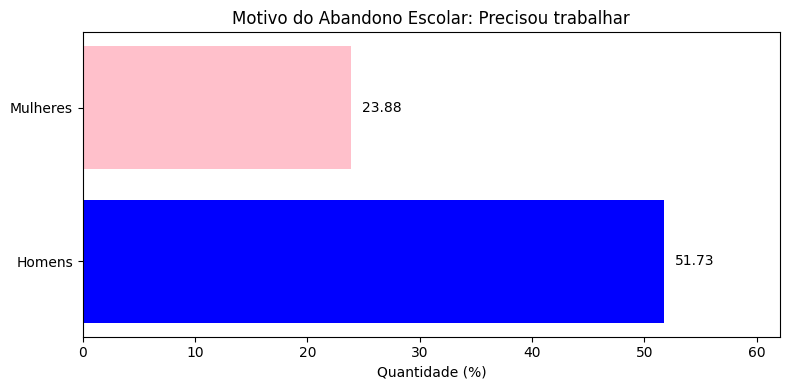

In [12]:
# Extrai os dados da célula C13 (linha 12) e C14 (linha 13)
valores = [df2.iloc[11, 2], df2.iloc[12, 2]]
categorias = ['Homens', 'Mulheres']

# Criação do gráfico
plt.figure(figsize=(8, 4))
bars = plt.barh(categorias, valores, color=['blue', 'pink'])

# Adiciona os rótulos com os valores exatos (sem arredondar)
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.2f}', va='center')

plt.xlabel('Quantidade (%)')
plt.title('Motivo do Abandono Escolar: Precisou trabalhar')
plt.xlim(0, max(valores)*1.2)
plt.tight_layout()
plt.show()

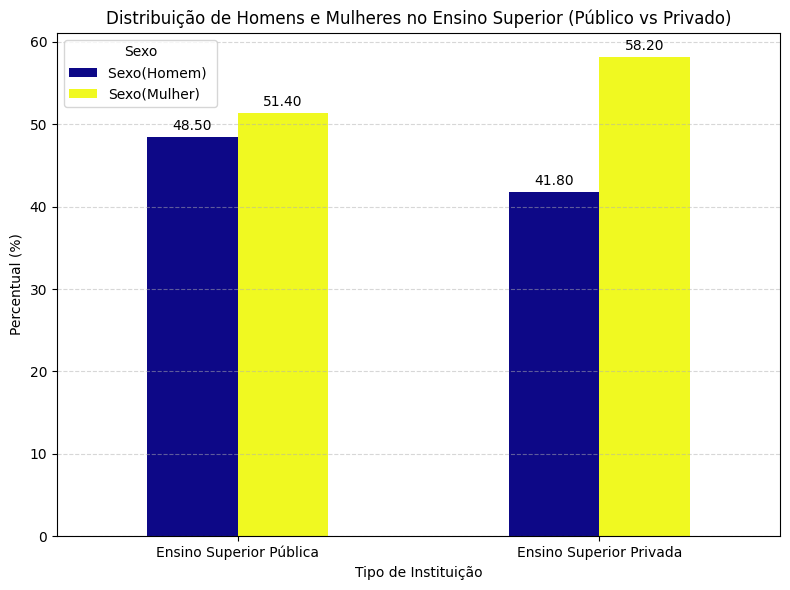

In [13]:
# Selecionar dados de Sexo(Homem) e Sexo(Mulher)
df_sexo = df.iloc[1:3]

# Renomear as colunas por índice (ajuste se necessário)
df_sexo = df_sexo.iloc[:, [0, 7, 8]]
df_sexo.columns = ['Sexo', 'Ensino Superior Pública', 'Ensino Superior Privada']

# Converter e arredondar os valores
df_sexo['Ensino Superior Pública'] = df_sexo['Ensino Superior Pública'].astype(float).round(2)
df_sexo['Ensino Superior Privada'] = df_sexo['Ensino Superior Privada'].astype(float).round(2)

# Reformular o dataframe para gráfico de barras agrupadas
df_plot = df_sexo.set_index('Sexo').T

# Plotar gráfico
ax = df_plot.plot(kind='bar', figsize=(8, 6), colormap='plasma', rot=0)

# Adicionar valores nas barras (embaixo)
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3)

# Personalização
plt.title('Distribuição de Homens e Mulheres no Ensino Superior (Público vs Privado)')
plt.ylabel('Percentual (%)')
plt.xlabel('Tipo de Instituição')
plt.legend(title='Sexo')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


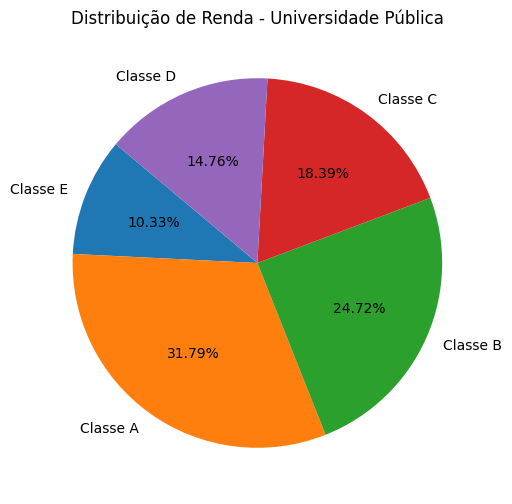

In [14]:
# Dados de exemplo para universidade pública (em porcentagem)
labels_publica = ['Classe E', 'Classe A', 'Classe B', 'Classe C', 'Classe D']
sizes_publica = [10.33, 31.79, 24.72, 18.39, 14.76]  # Substitua pelos seus valores reais


plt.figure(figsize=(6,6))
plt.pie(sizes_publica, labels=labels_publica, autopct='%1.2f%%', startangle=140)
plt.title('Distribuição de Renda - Universidade Pública')
plt.show()


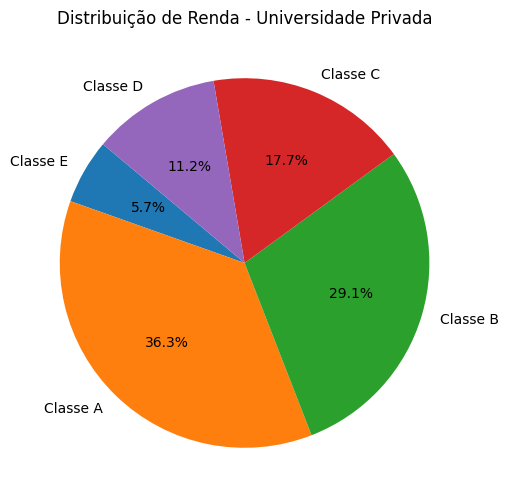

In [3]:
# Dados de exemplo para universidade privada (em porcentagem)
labels_privada = ['Classe E', 'Classe A', 'Classe B', 'Classe C', 'Classe D']
sizes_privada = [5.68, 36.33, 29.13, 17.65, 11.20]  # Substitua pelos seus valores reais

plt.figure(figsize=(6,6))
plt.pie(sizes_privada, labels=labels_privada, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de Renda - Universidade Privada')
plt.show()
